1. train 데이터 준비 
2. RandomForest/knn/Logistic Regression/DecisionTreeClassifier 4가지 알고리즘분석
3. 각각의 AUC 지표와 그래프 그리기
*(컴퓨터 문제로 Tree는 구현되지 않음)

In [1]:
import pandas as pd

train_df = pd.read_csv("train1.csv", nrows=10000)
train_df.head(3)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79


In [2]:

unused_columns = ["id","hour","device_id","device_ip"]
label_column = "click"

train_df = train_df.drop(unused_columns, axis=1)
X_dict_train = list(train_df.drop(label_column, axis=1).T.to_dict().values())
y_train = train_df[label_column]

test_df = pd.read_csv("train1.csv", header=0, skiprows=(1, 10000), nrows=10000)
test_df = test_df.drop(unused_columns, axis=1)
X_dict_test = list(test_df.drop(label_column, axis=1).T.to_dict().values())
y_test = test_df[label_column]

from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse=True) # 희소행렬이 만들어짐 

X_train = vectorizer.fit_transform(X_dict_train)
X_test = vectorizer.fit_transform(X_dict_test)

y_pred1 =  [0 0 0 ... 0 0 0]
acc1 =  0.9217
confus =  [[8163  131]
 [ 652 1054]]


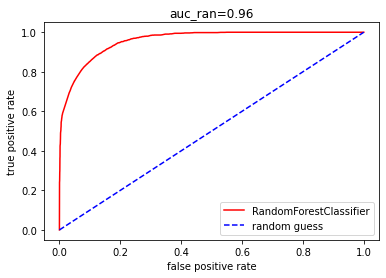

In [5]:
# RandomForest알고리즘 1) fit
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=123)
X = X_train
y = y_train
clf.fit(X,y)

# RandomForest알고리즘 2) predict
y_pred1 = clf.predict(X_test)
print("y_pred1 = ", y_pred1)

# RandomForest알고리즘 3) 정확도 검증
from sklearn.metrics import accuracy_score
print("acc1 = ", accuracy_score(y_test, y_pred1))

from sklearn.metrics import confusion_matrix
print("confus = ", confusion_matrix(y_test, y_pred1))

from sklearn.metrics import roc_auc_score, roc_curve
y_pred1_proba = clf.predict_proba(X_test)[:, 1]

fpr_ran, tpr_ran, _ = roc_curve(y_test, y_pred1_proba)
auc_ran = roc_auc_score(y_test, y_pred1_proba)

import matplotlib.pyplot as plt

plt.plot(fpr_ran, tpr_ran, "r-", label="RandomForestClassifier")
plt.plot([0,1], [0,1], "b--", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("auc_ran={0:.2f}".format(auc_ran))
plt.legend(loc="lower right")

y_pred2 =  [0 0 0 ... 0 0 0]
acc2 =  0.8967
confus =  [[7774  520]
 [ 513 1193]]


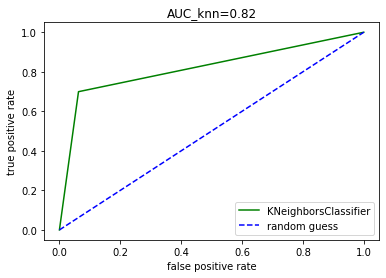

In [6]:
## knn 알고리즘 1) fit
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =1)
X = X_train
y = y_train
knn.fit(X_train, y_train)

## knn 알고리즘 2) predict
y_pred2 = knn.predict(X_test)
print("y_pred2 = ", y_pred2)

## knn 알고리즘 3) 정확도검증
y_pred2_proba = knn.score(X_test, y_test)


from sklearn.metrics import accuracy_score
print("acc2 = ", accuracy_score(y_test, y_pred2))

from sklearn.metrics import confusion_matrix
print("confus = ", confusion_matrix(y_test, y_pred2))

from sklearn.metrics import roc_auc_score, roc_curve
y_pred2_proba = knn.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred2_proba)
auc_knn = roc_auc_score(y_test, y_pred2_proba)


import matplotlib.pyplot as plt

plt.plot(fpr_knn, tpr_knn, "g-", label="KNeighborsClassifier")
plt.plot([0,1], [0,1], "b--", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC_knn={0:.2f}".format(auc_knn))
plt.legend(loc="lower right")

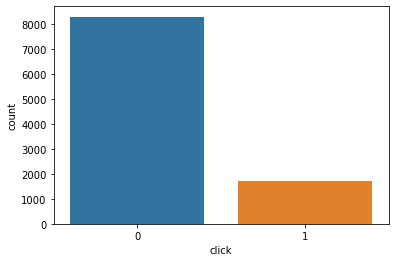

In [7]:
## Logistic Regression : 분석할 데이터가 두집단으로 나눠지는지 검증
## 데이터가 두집단 0 ,1로 나눠져있군요~!! 좋습니다
import seaborn as sns
sns.countplot(x = "click", data= train_df)
plt.show()

acc3 =  0.832
confus =  [[2491    2]
 [ 502    5]]


C:\Users\Mr. Jae-Hong Seo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


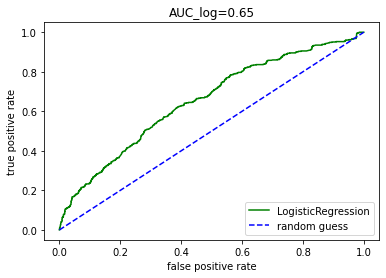

In [8]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=25)
log_clf = LogisticRegression() 

## Logistic Regression 1) fit
log_clf.fit(X_train,y_train) 

## Logistic Regression2) predict
y_pred3 = log_clf.predict(X_test)

## Logistic Regression 3) 정확도검증
y_pred3_proba = log_clf.score(X_test, y_test)


from sklearn.metrics import accuracy_score
print("acc3 = ", accuracy_score(y_test, y_pred3))

from sklearn.metrics import confusion_matrix
print("confus = ", confusion_matrix(y_test, y_pred3))

from sklearn.metrics import roc_auc_score, roc_curve
y_pred3_proba = log_clf.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred3_proba)
auc_log = roc_auc_score(y_test, y_pred3_proba)


import matplotlib.pyplot as plt

plt.plot(fpr_log, tpr_log, "g-", label="LogisticRegression")
plt.plot([0,1], [0,1], "b--", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC_log={0:.2f}".format(auc_log))
plt.legend(loc="lower right")


In [9]:
# 그리드 서치를 이용한 의사결정 트리 모델 학습 
#   DecisionTreeclassifier를 이용하여 의사결정 트리 모델 학습하기 


from sklearn.tree import DecisionTreeClassifier
parameters = {"max_depth":[3, 10, None]}
decision_tree = DecisionTreeClassifier(criterion="gini",
                                       min_samples_split=30)

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(decision_tree, parameters, 
                           n_jobs=-1, cv=3, scoring="roc_auc")  

# 그리드 서치를 이용해 적합화 시키기 
grid_search.fit(X_train, y_train)
decision_tree_best = grid_search.best_estimator_

In [10]:
# export_graphviz함수에 tree모델 지정 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(decision_tree_best, 
               out_file = None,
               feature_names=vectorizer.feature_names_,
               class_names=["0","1"], # click 유무 0.무, 1.유 
               rounded=True, # box를 round하게 
               filled=True, 
               impurity=True)

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin'

graph.write_png("ctr_decision_tree.png")

from IPython.core.display import Image
Image("ctr_decision_tree.png")

InvocationException: Program terminated with status: 1. stderr follows: 'C:\Users\Mr.' is not recognized as an internal or external command,
operable program or batch file.


y_pred =  [0 0 0 ... 0 0 0]
acc =  0.822
confus =  [[2434   59]
 [ 475   32]]


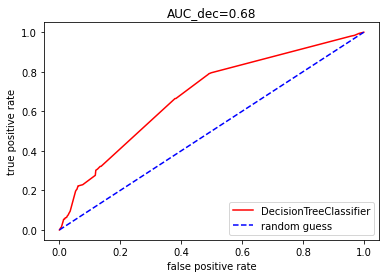

In [11]:
y_pred4 = decision_tree_best.predict(X_test)
print("y_pred = ", y_pred4)

from sklearn.metrics import accuracy_score
print("acc = ", accuracy_score(y_test, y_pred4))

from sklearn.metrics import confusion_matrix
print("confus = ", confusion_matrix(y_test, y_pred4))

from sklearn.metrics import roc_auc_score, roc_curve
y_pred4_proba = decision_tree_best.predict_proba(X_test)[:, 1]

fpr_dec, tpr_dec, _ = roc_curve(y_test, y_pred4_proba)
auc_dec = roc_auc_score(y_test, y_pred4_proba)

import matplotlib.pyplot as plt

plt.plot(fpr_dec, tpr_dec, "r-", label="DecisionTreeClassifier")
plt.plot([0,1], [0,1], "b--", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC_dec={0:.2f}".format(auc_dec))
plt.legend(loc="lower right")

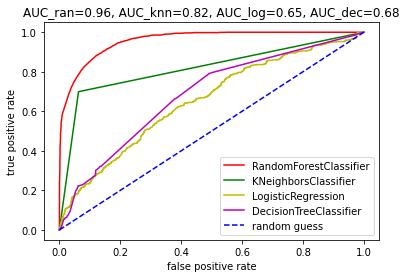

In [12]:
import matplotlib.pyplot as plt
plt.plot(fpr_ran,tpr_ran,"r-",label="RandomForestClassifier") # ROC커브
plt.plot(fpr_knn,tpr_knn,"g-",label="KNeighborsClassifier")
plt.plot(fpr_log, tpr_log,"y-",label="LogisticRegression")
plt.plot(fpr_dec,tpr_dec,"m-",label="DecisionTreeClassifier")
plt.plot([0,1],[0,1],"b--", label="random guess")  # 무위험선
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title(f"AUC_ran={round(auc_ran,2)}, AUC_knn={round(auc_knn,2)}, AUC_log={round(auc_log,2)}, AUC_dec={round(auc_dec,2)}")
plt.legend(loc="lower right")